# Symbolic Mathematics in Python

[Sympy](http://www.sympy.org/en/index.html) is described as a:

> "... Python library for symbolic mathematics."

This means it can be used to:

- Manipulate symbolic expressions;
- Solve symbolic equations;
- Carry out symbolic Calculus;
- Plot symbolic function.

It has other capabilities that we will not go in to in this handbook. But you can read more about it here: http://www.sympy.org/en/index.html

## Manipulating symbolic expressions

Before we can start using the library to manipulate expressions, we need to import it.

In [2]:
import sympy as sym

The above imports the library and gives us access to it's commands using the shortand `sym` which is conventially used.

If we wanted to get Python to check that $x - x = 0$ we would get an error if we did not tell Python what $x$ was.

This is where Sympy comes in, we can tell Python to create $x$ as a symbolic variable:

In [18]:
x = sym.symbols('x')

Now we can calculate $x - x$:

In [3]:
x - x

0

### Ways to Define Symbols using sympy:

We can create the following equations and verify $$2*x + 5*y$$ $$a*b + a - b$$ $$2*i*j + i*j$$



In [30]:
# Let's import the following classes first

from sympy import Symbol, symbols
from sympy.abc import x, y

Symbols can be imported from the sympy.abc module.
It exports all latin and greek letters as Symbols, so we can conveniently use them.

In [31]:
expr = 2*x + 5*y
print(expr)

2*x + 5*y


They can also be defined using Symbol.

In [26]:
a = Symbol('a')
b = Symbol('b')

expr2 = a*b + a - b
print(expr2)

a*b + a - b


Multiple Symbols can be defined using symbol.

In [28]:
i, j = symbols('i j')

expr3 = 2*i*j + i*j
print(expr3) 

3*i*j


We can create and manipulate expressions in Sympy. Let us for example verify:

$$(a + b) ^ 2 = a ^ 2 + 2ab + b ^2$$

First, we create the symbolic variables $a, b$:

In [4]:
a, b = sym.symbols('a, b')

Now let's create our expression:

In [23]:
expr = (a + b) ** 2 
print(expr)

(a + b)**2


**Note** we can get Sympy to use LaTeX so that the output looks nice in a notebook:

In [19]:
sym.init_printing()

In [21]:
expr

### Using pprint present in the sympy Library.
The pprint() is used for pretty printing the output on the console. The best results are achieved with LaTeX e.g. in Jupyter notebook. 

Let's verify with $$e^{2x}/2$$


In [34]:

x = sym.symbols('x')

a = sym.sqrt(2)
sym.pprint(a)
print(a)

print("------------------------")

c = (sym.exp(x) ** 2)/2
pprint(c)
print(c)


√2
sqrt(2)
------------------------
 2⋅x
ℯ   
────
 2  
exp(2*x)/2


Let us expand our expression:$$(a+b)^2$$

In [8]:
expr.expand()

Note that we can also get Sympy to produce the LaTeX code for future use:

In [9]:
sym.latex(expr.expand())

'a^{2} + 2 a b + b^{2}'

---
**EXERCISE** Use Sympy to verify the following expressions:

- $(a - b) ^ 2 = a ^ 2 - 2 a b + b^2$
- $a ^ 2 - b ^ 2 = (a - b) (a + b)$ (instead of using `expand`, try `factor`)

In [11]:
import sympy as sym
a,b=sym.symbols('a,b')
expr1=(a-b)**2
sym.latex(expr1.expand()) == 'a^{2} - 2 a b + b^{2}'
print(expr1.expand())
expr2=a**2-b**2
print(expr2.factor())
sym.latex(expr2.factor()) 

a**2 - 2*a*b + b**2
(a - b)*(a + b)


'\\left(a - b\\right) \\left(a + b\\right)'

## Solving symbolic equations

We can use Sympy to solve symbolic expression. For example let's find the solution in $x$ of the quadratic equation:

$$a x ^ 2 + b x + c = 0$$

In [13]:
# We only really need to define `c` but doing them all again.
a, b, c, x = sym.symbols('a, b, c, x')  

The Sympy command for solving equations is `solveset`. The first argument is an expression for which the root will be found. The second argument is the value that we are solving for.

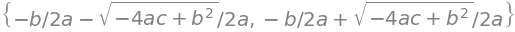

In [16]:
sym.solveset(a * x ** 2 + b * x + c, x)

---
**EXERCISE** Use Sympy to find the solutions to the generic cubic equation:

$$a x ^ 3 + b x ^ 2 + c  x + d = 0$$

---

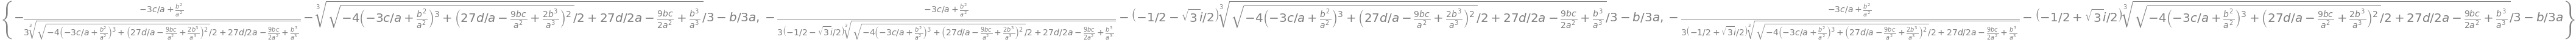

In [18]:
import sympy as sym
a,b,c,d,x=sym.symbols('a,b,c,d,x')
sym.solveset(a * x ** 3 + b * x ** 2 + c * x + d,x)

It is possible to pass more arguments to `solveset` for example to constrain the solution space. Let us see what the solution of the following is in $\mathbb{R}$:

$$x^2=-1$$

In [24]:
sym.solveset(x ** 2 + 1, x, domain=sym.S.Reals)

---
**EXERCISE** Use Sympy to find the solutions to the following equations:

- $x ^ 2 == 2$ in $\mathbb{N}$;
- $x ^ 3 + 2 x = 0$ in $\mathbb{R}$.

---

In [30]:
sym.solveset(x**2 == 2,x)

In [26]:
sym.solveset(x ** 3 + 2 * x,x,domain=sym.S.Reals)

## Symbolic calculus

We can use Sympy to compute limits. Let us calculate:

$$\lim_{x\to 0^+}\frac{1}{x}$$

In [31]:
sym.limit(1/x, x, 0, dir="+")

---
**EXERCISE** Compute the following limits:

1. $\lim_{x\to 0^-}\frac{1}{x}$
2.  $\lim_{x\to 0}\frac{1}{x^2}$

---

In [33]:
sym.limit(1 / x,x,0,dir="-")

In [34]:
sym.limit(1 / x**2,x,0)

We can use also Sympy to differentiate and integrate. Let us experiment with differentiating the following expression:

$$x ^ 2 - \cos(x)$$

In [35]:
sym.diff(x ** 2 - sym.cos(x), x)

Similarly we can integrate:

In [36]:
sym.integrate(x ** 2 - sym.cos(x), x)

We can also carry out definite integrals:

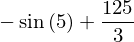

In [16]:
sym.integrate(x ** 2 - sym.cos(x), (x, 0, 5))

---

**EXERCISE** Use Sympy to calculate the following:

1. $\frac{d\sin(x ^2)}{dx}$
2. $\frac{d(x ^2 + xy - \ln(y))}{dy}$
3. $\int e^x \cos(x)\;dx$
4. $\int_0^5 e^{2x}\;dx$

In [38]:
sym.diff(sym.sin(x**2),x)

In [12]:
y=sym.symbols('y')
z=sym.diff(x**2 + x * y - sym.log(y),y)
print(z)

x - 1/y


In [44]:
sym.integrate(sym.exp(x)*sym.cos(x),x)

In [47]:
sym.integrate(sym.exp(2*x),x,(x,0,5))

## Plotting with Sympy

Finally Sympy can be used to plot functions. Note that this makes use of another Python library called [matplotlib](http://matplotlib.org/). Whilst Sympy allows us to not directly need to make use of matplotlib it could be worth learning to use as it's a very powerful and versatile library.

Before plotting in Jupyter we need to run a command to tell it to display the plots directly in the notebook:

In [49]:
%matplotlib inline

Let us plot $x^2$:

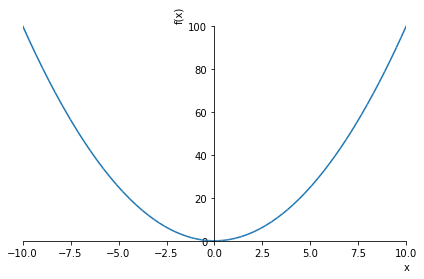

In [50]:
expr = x ** 2
p = sym.plot(expr);

We can directly save that plot to a file if we wish to:

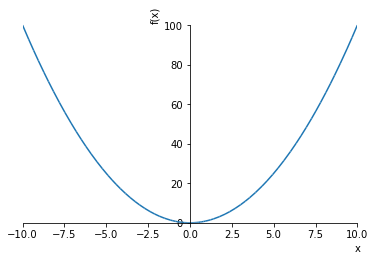

In [51]:
p.save("x_squared.pdf");

---
**EXERCISE** Plot the following functions:

- $y=x + cos(x)$
- $y=x ^ 2 - e^x$ (you might find `ylim` helpful as an argument)

Experiment with saving your plots to a file.

---

## Summary

This section has discussed using Sympy to:

- Manipulate symbolic expressions;
- Calculate limits, derivates and integrals;
- Plot a symbolic expression.
    
This just touches the surface of what Sympy can do.

Let us move on to using [Numpy](02 - Linear algebra with Numpy.ipynb) to do Linear Algebra.

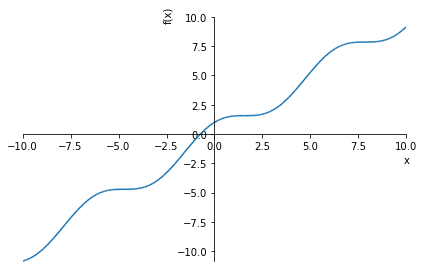

In [56]:
y=x + sym.cos(x)
p=sym.plot(y)


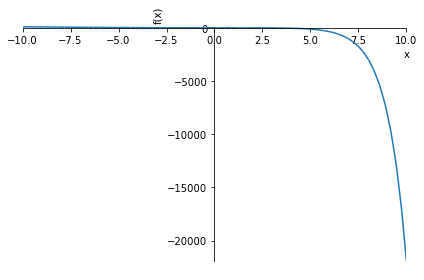

In [57]:
y= x**2 - sym.exp(x)
p=sym.plot(y)


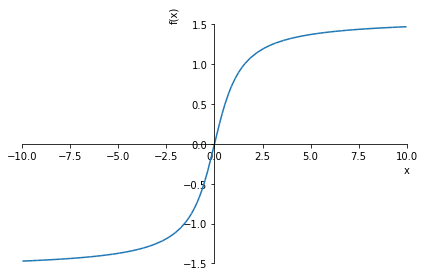

In [15]:
x=sym.symbols('x')
p=sym.plot(sym.atan(x))